In [67]:
import pandas as pd
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline


from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
import statsmodels.api as sm


from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn import linear_model

import pmdarima as pm
from pmdarima.model_selection import train_test_split

from fbprophet import Prophet

from pandas import to_datetime

import itertools
import warnings

import datetime
from datetime import datetime
warnings.filterwarnings('ignore')

In [2]:
all_files = sorted(glob('semanal*.xlsx'))
df = pd.concat((pd.read_excel(file, skiprows=17) for file in all_files), ignore_index=True)
df

,DATA INICIAL,DATA FINAL,REGIÃO,ESTADO,PRODUTO,NÚMERO DE POSTOS PESQUISADOS,UNIDADE DE MEDIDA,PREÇO MÉDIO REVENDA,DESVIO PADRÃO REVENDA,PREÇO MÍNIMO REVENDA,PREÇO MÁXIMO REVENDA,MARGEM MÉDIA REVENDA,COEF DE VARIAÇÃO REVENDA,PREÇO MÉDIO DISTRIBUIÇÃO,DESVIO PADRÃO DISTRIBUIÇÃO,PREÇO MÍNIMO DISTRIBUIÇÃO,PREÇO MÁXIMO DISTRIBUIÇÃO,COEF DE VARIAÇÃO DISTRIBUIÇÃO
0,2004-05-09,2004-05-15,CENTRO OESTE,DISTRITO FEDERAL,ETANOL HIDRATADO,127,R$/l,1.288,0.016,1.190,1.350,0.463,0.012,0.825,0.11,0.4201,0.9666,0.133
1,2004-05-09,2004-05-15,CENTRO OESTE,GOIAS,ETANOL HIDRATADO,387,R$/l,1.162,0.114,0.890,1.449,0.399,0.098,0.763,0.088,0.5013,1.05,0.115
2,2004-05-09,2004-05-15,CENTRO OESTE,MATO GROSSO,ETANOL HIDRATADO,192,R$/l,1.389,0.097,1.180,1.760,0.419,0.070,0.97,0.095,0.5614,1.161,0.098
3,2004-05-09,2004-05-15,CENTRO OESTE,MATO GROSSO DO SUL,ETANOL HIDRATADO,162,R$/l,1.262,0.070,1.090,1.509,0.432,0.055,0.83,0.119,0.5991,1.22242,0.143
4,2004-05-09,2004-05-15,NORDESTE,ALAGOAS,ETANOL HIDRATADO,103,R$/l,1.181,0.078,1.050,1.400,0.24,0.066,0.941,0.077,0.7441,1.0317,0.082
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131004,2022-05-29,2022-06-04,NORTE,RORAIMA,OLEO DIESEL S10,12,R$/l,7.288,0.126,7.210,7.660,-,0.017,-,-,-,-,-
131005,2022-05-29,2022-06-04,SUL,SANTA CATARINA,OLEO DIESEL S10,163,R$/l,6.887,0.199,6.499,7.599,-,0.029,-,-,-,-,-
131006,2022-05-29,2022-06-04,SUDESTE,SAO PAULO,OLEO DIESEL S10,1183,R$/l,6.918,0.236,6.360,8.200,-,0.034,-,-,-,-,-
131007,2022-05-29,2022-06-04,NORDESTE,SERGIPE,OLEO DIESEL S10,45,R$/l,6.905,0.290,6.000,7.390,-,0.042,-,-,-,-,-


In [3]:
df.isnull().sum()

DATA INICIAL                     0
DATA FINAL                       0
REGIÃO                           0
ESTADO                           0
PRODUTO                          0
NÚMERO DE POSTOS PESQUISADOS     0
UNIDADE DE MEDIDA                0
PREÇO MÉDIO REVENDA              0
DESVIO PADRÃO REVENDA            0
PREÇO MÍNIMO REVENDA             0
PREÇO MÁXIMO REVENDA             0
MARGEM MÉDIA REVENDA             0
COEF DE VARIAÇÃO REVENDA         0
PREÇO MÉDIO DISTRIBUIÇÃO         0
DESVIO PADRÃO DISTRIBUIÇÃO       0
PREÇO MÍNIMO DISTRIBUIÇÃO        0
PREÇO MÁXIMO DISTRIBUIÇÃO        0
COEF DE VARIAÇÃO DISTRIBUIÇÃO    0
dtype: int64

In [4]:
df.replace('-', np.nan)
df

,DATA INICIAL,DATA FINAL,REGIÃO,ESTADO,PRODUTO,NÚMERO DE POSTOS PESQUISADOS,UNIDADE DE MEDIDA,PREÇO MÉDIO REVENDA,DESVIO PADRÃO REVENDA,PREÇO MÍNIMO REVENDA,PREÇO MÁXIMO REVENDA,MARGEM MÉDIA REVENDA,COEF DE VARIAÇÃO REVENDA,PREÇO MÉDIO DISTRIBUIÇÃO,DESVIO PADRÃO DISTRIBUIÇÃO,PREÇO MÍNIMO DISTRIBUIÇÃO,PREÇO MÁXIMO DISTRIBUIÇÃO,COEF DE VARIAÇÃO DISTRIBUIÇÃO
0,2004-05-09,2004-05-15,CENTRO OESTE,DISTRITO FEDERAL,ETANOL HIDRATADO,127,R$/l,1.288,0.016,1.190,1.350,0.463,0.012,0.825,0.11,0.4201,0.9666,0.133
1,2004-05-09,2004-05-15,CENTRO OESTE,GOIAS,ETANOL HIDRATADO,387,R$/l,1.162,0.114,0.890,1.449,0.399,0.098,0.763,0.088,0.5013,1.05,0.115
2,2004-05-09,2004-05-15,CENTRO OESTE,MATO GROSSO,ETANOL HIDRATADO,192,R$/l,1.389,0.097,1.180,1.760,0.419,0.070,0.97,0.095,0.5614,1.161,0.098
3,2004-05-09,2004-05-15,CENTRO OESTE,MATO GROSSO DO SUL,ETANOL HIDRATADO,162,R$/l,1.262,0.070,1.090,1.509,0.432,0.055,0.83,0.119,0.5991,1.22242,0.143
4,2004-05-09,2004-05-15,NORDESTE,ALAGOAS,ETANOL HIDRATADO,103,R$/l,1.181,0.078,1.050,1.400,0.24,0.066,0.941,0.077,0.7441,1.0317,0.082
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131004,2022-05-29,2022-06-04,NORTE,RORAIMA,OLEO DIESEL S10,12,R$/l,7.288,0.126,7.210,7.660,-,0.017,-,-,-,-,-
131005,2022-05-29,2022-06-04,SUL,SANTA CATARINA,OLEO DIESEL S10,163,R$/l,6.887,0.199,6.499,7.599,-,0.029,-,-,-,-,-
131006,2022-05-29,2022-06-04,SUDESTE,SAO PAULO,OLEO DIESEL S10,1183,R$/l,6.918,0.236,6.360,8.200,-,0.034,-,-,-,-,-
131007,2022-05-29,2022-06-04,NORDESTE,SERGIPE,OLEO DIESEL S10,45,R$/l,6.905,0.290,6.000,7.390,-,0.042,-,-,-,-,-


In [5]:
df.isnull().sum()

DATA INICIAL                     0
DATA FINAL                       0
REGIÃO                           0
ESTADO                           0
PRODUTO                          0
NÚMERO DE POSTOS PESQUISADOS     0
UNIDADE DE MEDIDA                0
PREÇO MÉDIO REVENDA              0
DESVIO PADRÃO REVENDA            0
PREÇO MÍNIMO REVENDA             0
PREÇO MÁXIMO REVENDA             0
MARGEM MÉDIA REVENDA             0
COEF DE VARIAÇÃO REVENDA         0
PREÇO MÉDIO DISTRIBUIÇÃO         0
DESVIO PADRÃO DISTRIBUIÇÃO       0
PREÇO MÍNIMO DISTRIBUIÇÃO        0
PREÇO MÁXIMO DISTRIBUIÇÃO        0
COEF DE VARIAÇÃO DISTRIBUIÇÃO    0
dtype: int64

In [6]:
df.columns

Index(['DATA INICIAL', 'DATA FINAL', 'REGIÃO', 'ESTADO', 'PRODUTO',
       'NÚMERO DE POSTOS PESQUISADOS', 'UNIDADE DE MEDIDA',
       'PREÇO MÉDIO REVENDA', 'DESVIO PADRÃO REVENDA', 'PREÇO MÍNIMO REVENDA',
       'PREÇO MÁXIMO REVENDA', 'MARGEM MÉDIA REVENDA',
       'COEF DE VARIAÇÃO REVENDA', 'PREÇO MÉDIO DISTRIBUIÇÃO',
       'DESVIO PADRÃO DISTRIBUIÇÃO', 'PREÇO MÍNIMO DISTRIBUIÇÃO',
       'PREÇO MÁXIMO DISTRIBUIÇÃO', 'COEF DE VARIAÇÃO DISTRIBUIÇÃO'],
      dtype='object')

In [7]:
df.drop(['MARGEM MÉDIA REVENDA', 'PREÇO MÉDIO DISTRIBUIÇÃO', 'DESVIO PADRÃO DISTRIBUIÇÃO', 'PREÇO MÍNIMO DISTRIBUIÇÃO', 'PREÇO MÁXIMO DISTRIBUIÇÃO', 'COEF DE VARIAÇÃO DISTRIBUIÇÃO'], axis=1, inplace=True)

In [8]:
df.isnull().sum()

DATA INICIAL                    0
DATA FINAL                      0
REGIÃO                          0
ESTADO                          0
PRODUTO                         0
NÚMERO DE POSTOS PESQUISADOS    0
UNIDADE DE MEDIDA               0
PREÇO MÉDIO REVENDA             0
DESVIO PADRÃO REVENDA           0
PREÇO MÍNIMO REVENDA            0
PREÇO MÁXIMO REVENDA            0
COEF DE VARIAÇÃO REVENDA        0
dtype: int64

In [9]:
df

,DATA INICIAL,DATA FINAL,REGIÃO,ESTADO,PRODUTO,NÚMERO DE POSTOS PESQUISADOS,UNIDADE DE MEDIDA,PREÇO MÉDIO REVENDA,DESVIO PADRÃO REVENDA,PREÇO MÍNIMO REVENDA,PREÇO MÁXIMO REVENDA,COEF DE VARIAÇÃO REVENDA
0,2004-05-09,2004-05-15,CENTRO OESTE,DISTRITO FEDERAL,ETANOL HIDRATADO,127,R$/l,1.288,0.016,1.190,1.350,0.012
1,2004-05-09,2004-05-15,CENTRO OESTE,GOIAS,ETANOL HIDRATADO,387,R$/l,1.162,0.114,0.890,1.449,0.098
2,2004-05-09,2004-05-15,CENTRO OESTE,MATO GROSSO,ETANOL HIDRATADO,192,R$/l,1.389,0.097,1.180,1.760,0.070
3,2004-05-09,2004-05-15,CENTRO OESTE,MATO GROSSO DO SUL,ETANOL HIDRATADO,162,R$/l,1.262,0.070,1.090,1.509,0.055
4,2004-05-09,2004-05-15,NORDESTE,ALAGOAS,ETANOL HIDRATADO,103,R$/l,1.181,0.078,1.050,1.400,0.066
...,...,...,...,...,...,...,...,...,...,...,...,...
131004,2022-05-29,2022-06-04,NORTE,RORAIMA,OLEO DIESEL S10,12,R$/l,7.288,0.126,7.210,7.660,0.017
131005,2022-05-29,2022-06-04,SUL,SANTA CATARINA,OLEO DIESEL S10,163,R$/l,6.887,0.199,6.499,7.599,0.029
131006,2022-05-29,2022-06-04,SUDESTE,SAO PAULO,OLEO DIESEL S10,1183,R$/l,6.918,0.236,6.360,8.200,0.034
131007,2022-05-29,2022-06-04,NORDESTE,SERGIPE,OLEO DIESEL S10,45,R$/l,6.905,0.290,6.000,7.390,0.042


In [10]:
df['PRODUTO'].unique()

array(['ETANOL HIDRATADO', 'GASOLINA COMUM', 'GLP', 'GNV', 'ÓLEO DIESEL',
       'OLEO DIESEL', 'OLEO DIESEL S10', 'GASOLINA ADITIVADA'],
      dtype=object)

In [11]:
df_etanol = df[df['PRODUTO'] == 'ETANOL HIDRATADO']

In [12]:
df_etanol = df_etanol[['DATA FINAL', 'ESTADO', 'PREÇO MÉDIO REVENDA']]

In [13]:
df_etanol['DATA FINAL'] = pd.to_datetime(df_etanol['DATA FINAL'])

In [14]:
df_etanol.dtypes

DATA FINAL             datetime64[ns]
ESTADO                         object
PREÇO MÉDIO REVENDA           float64
dtype: object

In [20]:
X_train_etanol = df_etanol[df_etanol['DATA FINAL'] <='2017-11-01']
X_valid_etanol = df_etanol[df_etanol['DATA FINAL'] >'2017-11-01']

print('X_train_etanol Shape', X_train_etanol.shape)
print('X_valid_etanol Shape', X_valid_etanol.shape)

X_train_etanol['DATA FINAL'].max()

X_train_etanol Shape (18798, 3)
X_valid_etanol Shape (6165, 3)


Timestamp('2017-10-28 00:00:00')

In [55]:
sp_v['DATA FINAL'].max()

Timestamp('2022-06-04 00:00:00')

In [16]:
sp = X_train_etanol[X_train_etanol['ESTADO'] == 'SAO PAULO']
sp2 = sp[['DATA FINAL', 'PREÇO MÉDIO REVENDA']]

sp_v = X_valid_etanol[X_valid_etanol['ESTADO'] == 'SAO PAULO']
sp_v2 = sp_v[['DATA FINAL', 'PREÇO MÉDIO REVENDA']]

In [17]:
sp2.set_index('DATA FINAL', inplace=True)
sp_v2.set_index('DATA FINAL', inplace=True)

In [58]:
index_12_weeks = pd.date_range(sp2.index[-1], freq='W-SAT', periods=232)

In [22]:
index_12_weeks

DatetimeIndex(['2017-10-28', '2017-11-04', '2017-11-11', '2017-11-18',
               '2017-11-25', '2017-12-02', '2017-12-09', '2017-12-16',
               '2017-12-23', '2017-12-30', '2018-01-06', '2018-01-13'],
              dtype='datetime64[ns]', freq='W-SAT')

ARIMA

In [56]:
sp[['DATA FINAL']].max()

DATA FINAL   2017-10-28
dtype: datetime64[ns]

In [69]:
sp2

,PREÇO MÉDIO REVENDA
DATA FINAL,
2004-05-15,0.768
2004-05-22,0.766
2004-05-29,0.823
2004-06-05,0.887
2004-06-12,0.894
...,...
2017-09-30,2.475
2017-10-07,2.467
2017-10-14,2.476


The MSE of ARIMA is: 1.7690489890532182


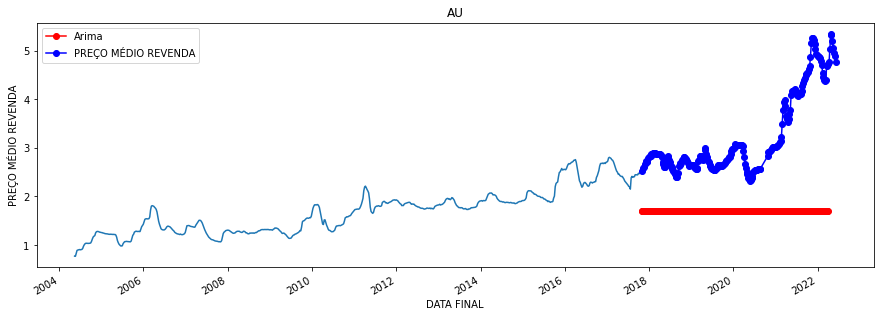

In [66]:
# Running ARIMA with random numbers
model_arima = ARIMA(sp2, order=(0,0,0)) # start 2-0-0 and move to the best
model_arima_fit = model_arima.fit()

# Saving ARIMA predictions
fcast1 = model_arima_fit.predict(232)[0]

# Passing the same index as the others
fcast1 = pd.Series(fcast1, index=index_12_weeks)
fcast1 = fcast1.rename("Arima") 

# Ploting the predictions
fig, ax = plt.subplots(figsize=(15,5))
chart = sns.lineplot(x='DATA FINAL', y='PREÇO MÉDIO REVENDA', data = sp)
chart.set_title('AU')
fcast1.plot(ax=ax, color='red', marker="o", legend=True)
sp_v2.plot(ax=ax, color='blue', marker="o", legend=True)

# Printing the AI
print('The MSE of ARIMA is:', mean_squared_error(sp_v['PREÇO MÉDIO REVENDA'].values, fcast1.values, squared=False))

<AxesSubplot:title={'center':'AU'}, xlabel='DATA FINAL', ylabel='PREÇO MÉDIO REVENDA'>

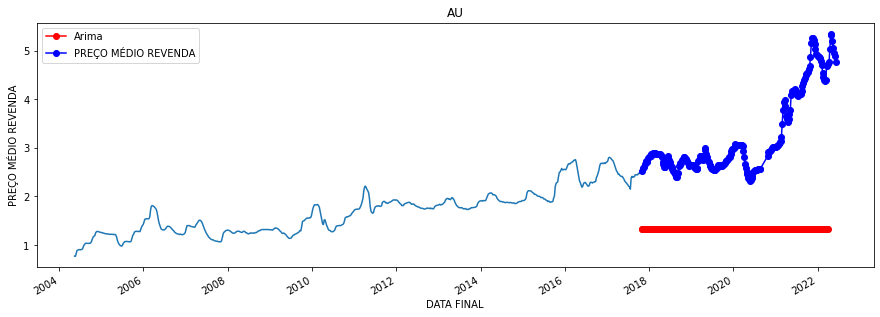

In [82]:
model_arima = sm.tsa.statespace.SARIMAX(sp2, order=(14,1,14), seasonal_order=(1,1,1,20))
model_arima_fit = model_arima.fit()

fcast1 = model_arima_fit.predict(232, dynamic=True)[0]

fcast1 = pd.Series(fcast1, index=index_12_weeks)
fcast1 = fcast1.rename("Arima") 

fig, ax = plt.subplots(figsize=(15,5))
chart = sns.lineplot(x='DATA FINAL', y='PREÇO MÉDIO REVENDA', data = sp)
chart.set_title('AU')
fcast1.plot(ax=ax, color='red', marker="o", legend=True)
sp_v2.plot(ax=ax, color='blue', marker="o", legend=True)